In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

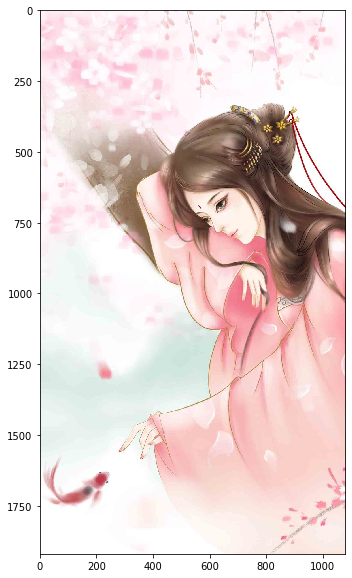

In [2]:
img = cv2.imread('./anime.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img)
plt.show()

<div class="alert alert-block alert-success"> 
<b>轮廓可以简单地认为成由连续的点组成的曲线，这些点具有相同的颜色或者灰度</b>!
</div>

<div class="alert alert-block alert-success"> 
<b>为了更加准确，在寻找轮廓之前要进行阈值化处理或Canny边界检测。在Opencv中，查找轮廓就像在黑色背景中找出白色物体</b>!
</div>

<div class="alert alert-block alert-danger">   
<b>Opencv的轮廓检测函数会修改出入的图像本身，如果你还想使用原图像需要将其保存到另一个变量中</b>!
</div>

#### cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]])
+ image:二值图，即黑白的（不是灰度图），所以读取的图像要先转成灰度的，再转成二值图
+ mode:轮廓检索模式
+ method：轮廓近似方法

#### 返回三个元素：
+ 图像：与输入图像一样
+ 轮廓：M各轮廓，每个轮廓用位于该轮廓上像素点的位置表示
+ 轮廓的层次结构：与返回的‘轮廓’的个数一样，每个元素本质上是对返回值‘轮廓’进行分类，以划分嵌套轮廓的层级结构，可参考该[博客](https://blog.csdn.net/jjddss/article/details/73527990)


返回的轮廓为一个list，list的每一个元素用于表示一个轮廓，每个轮廓为具有shape为[M, 1, 2]的array，arry中的元素代表位于该轮廓上的像素点的位置。

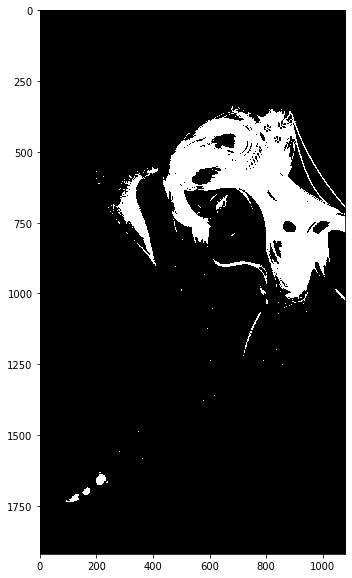

In [3]:
img_org = img.copy()

img_binary = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh, img_binary = cv2.threshold(img_binary, 127, 255, cv2.THRESH_BINARY_INV)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_binary, cmap='gray')
plt.show()

#### cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]])
+ image:
+ mode:表示轮廓的检索模式，有四种（本文介绍的都是新的cv2接口）：
    + cv2.RETR_EXTERNAL表示只检测外轮廓
    + cv2.RETR_LIST检测的轮廓不建立等级关系
    + cv2.RETR_CCOMP建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层。
    + cv2.RETR_TREE建立一个等级树结构的轮廓。
+ method:轮廓的近似办法
    + cv2.CHAIN_APPROX_NONE存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max（abs（x1-x2），abs（y2-y1））==1
    + cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需4个点来保存轮廓信息
    + cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS使用teh-Chinl chain 近似算法

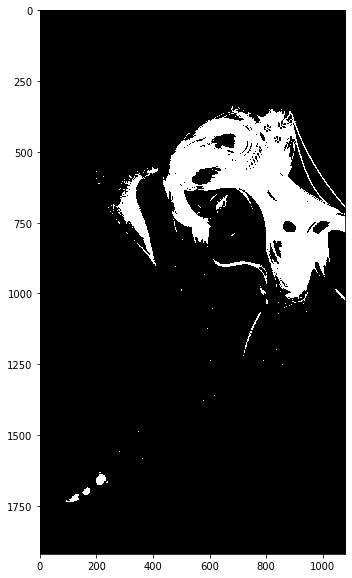

In [4]:
img_contour, contour, structure = cv2.findContours(image=img_binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_contour, cmap='gray')
plt.show()

In [5]:
len(contour), structure.shape

(894, (1, 894, 4))

#### cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]])
+ image:
+ contours:所有轮廓
+ contourIdx：需要画出来的轮廓在contours里面的位置
+ color：轮廓线/填充颜色

2691 487 (2691, 1, 2)


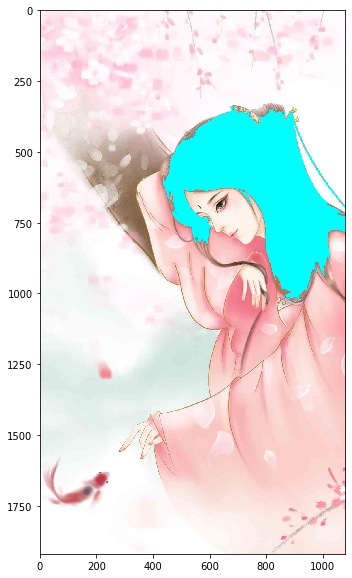

In [6]:
# 画出上面所有找到的轮廓中面积最大的

mark = 0
idx = 0
for i, c in enumerate(contour):
    if c.shape[0] > mark:
        mark = c.shape[0]
        idx = i
        
print(mark, idx, contour[idx].shape)

img_one_contour = cv2.drawContours(image=img_org, 
                               contours=contour, 
                               contourIdx=idx, 
                               color=[0, 255, 255], 
                               thickness=-1)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_one_contour, cmap='gray')
plt.show()